In [1]:
import os
from blendshapes import *

# load the blendshape model
PROJ_PATH = "/home/zhecheng/Workspace/ManifoldExploration"
BLENDSHAPES_PATH = os.path.join(os.pardir, "data", "Apple blendshapes51 OBJs", "OBJs")
model = load_blendshape_model(BLENDSHAPES_PATH)

0 eyeLookDownRight .gltf
0 eyeLookInRight .gltf
0 mouthStretchRight .obj
1 mouthDimpleLeft .gltf
1 browInnerUp .gltf
1 mouthUpperUpRight .gltf
1 mouthStretchLeft .gltf
1 mouthDimpleRight .gltf
1 mouthLowerDownRight .gltf
1 jawLeft .gltf
1 mouthFrownRight .obj
2 eyeLookInLeft .obj
3 eyeBlinkRight .obj
4 browOuterUpRight .gltf
4 jawRight .gltf
4 mouthFrownLeft .obj
5 mouthRight .obj
6 cheekSquintLeft .obj
7 eyeSquintLeft .obj
8 mouthFrownRight .gltf
8 eyeBlinkLeft .gltf
8 eyeLookOutRight .obj
9 eyeLookUpRight .gltf
9 eyeLookOutLeft .gltf
9 mouthUpperUpLeft .gltf
9 mouthPressRight .obj
10 browOuterUpLeft .obj
11 mouthFrownLeft .gltf
11 mouthUpperUpRight .obj
12 mouthShrugLower .gltf
12 mouthPressLeft .obj
13 noseSneerLeft .obj
14 mouthShrugUpper .obj
15 mouthPucker .gltf
15 mouthLowerDownRight .obj
16 eyeWideLeft .obj
17 cheekSquintRight .obj
18 eyeLookOutRight .gltf
18 eyeWideLeft .gltf
18 mouthClose .obj
19 mouthLowerDownLeft .obj
20 eyeBlinkRight .gltf
20 browOuterUpRight .obj
21 cheek

  o Neutral
  o mouthStretchRight
  o mouthFrownRight
  o eyeLookInLeft
  o eyeBlinkRight
  o mouthFrownLeft
  o mouthRight
  o cheekSquintLeft
  o eyeSquintLeft
  o eyeLookOutRight
  o mouthPressRight
  o browOuterUpLeft
  o mouthUpperUpRight
  o mouthPressLeft
  o noseSneerLeft
  o mouthShrugUpper
  o mouthLowerDownRight
  o eyeWideLeft
  o cheekSquintRight
  o mouthClose
  o mouthLowerDownLeft
  o browOuterUpRight
  o jawLeft
  o mouthPucker
  o eyeBlinkLeft
  o eyeLookDownRight
  o eyeLookDownLeft
  o eyeWideRight
  o eyeLookOutLeft
  o mouthStretchLeft
  o browDownRight
  o browDownLeft
  o mouthDimpleRight
  o mouthFunnel
  o mouthLeft
  o browInnerUp
  o mouthSmileRight
  o jawForward
  o noseSneerRight
  o cheekPuff
  o mouthSmileLeft
  o eyeLookInRight
  o jawOpen
  o mouthRollLower
  o eyeLookUpLeft
  o mouthShrugLower
  o mouthRollUpper
  o jawRight
  o mouthUpperUpLeft
  o eyeSquintRight
  o eyeLookUpRight
  o mouthDimpleLeft


In [2]:
from clustering import *
clusters, symmetric_blendshapes = cluster_blendshapes(model, cluster_threshold=0.05, activate_threshold=0.2)
print("Number of clusters: ", len(clusters))
print(clusters)

Number of clusters:  5
[[32, 38, 22, 33, 5, 46, 21, 41, 36, 9, 12, 18, 44, 42, 19, 15], [28, 50, 39, 4, 47, 14, 45, 13], [27, 23, 25, 2, 16, 43, 30], [17, 48], [34, 20]]


In [3]:
from submanifold_metrics import *
clusters = clusters[-2:]
submanifold_metric(model, clusters, N=50)

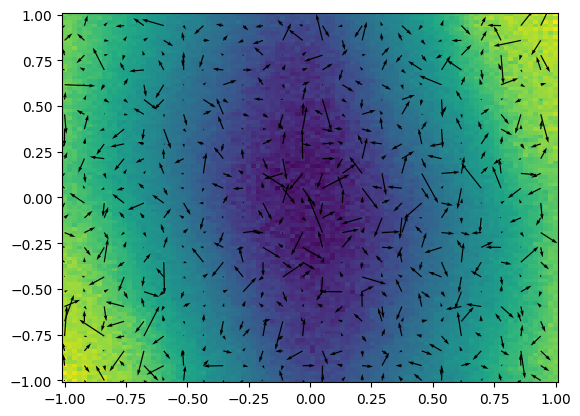

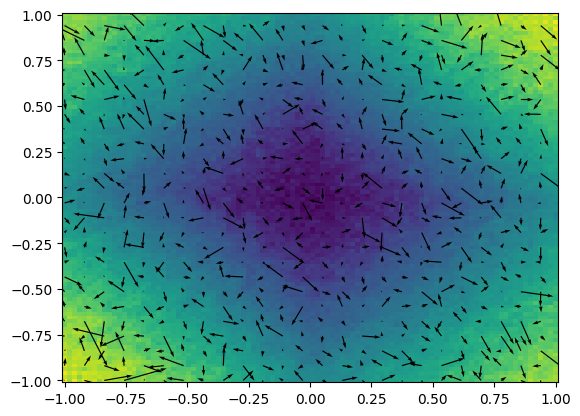

In [30]:
from inference import *
import seaborn as sns
import matplotlib.pyplot as plt

N = 100
SAMPLE_RATE = 4
X = np.linspace(-1, 1, N)
Y = np.linspace(-1, 1, N)

N_CLUSTERS = len(clusters)
for c in range(N_CLUSTERS):
    NB = len(clusters)
    for i in range(NB):
        id0 = clusters[c][i]
        for j in range(i+1, NB):
            id1 = clusters[c][j]
            # load submanifold metric
            MODEL_PATH = f"c{c}_{id0}_{id1}.pt"
            MODEL_PATH = os.path.join(PROJ_PATH, "src", MODEL_PATH)
            if not os.path.exists(MODEL_PATH):
                continue
            model = load_model(MODEL_PATH)
            coords = sample_cspace(N)
            # inference
            pred, pred_grad = infer(model, coords, return_grad=True)
            coords = coords[:, ::SAMPLE_RATE, ::SAMPLE_RATE]
            pred_grad = pred_grad[::SAMPLE_RATE, ::SAMPLE_RATE, :]
            plt.pcolormesh(X, Y, pred)
            plt.quiver(coords[0], coords[1], pred_grad[...,0], pred_grad[...,1])
            print()
            plt.show()